In [2]:
import numpy as np
import cv2
from PIL import Image
from PIL import ImageEnhance
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

**I.Adjust Brightness**

1.opencv code chay

In [6]:
def adjust_brightness(img, value=30):
    b, g, r = cv.split(img)
    if value < 0:
        lim = 0 + abs(value)
        b[b < lim] = 0
        b[b >= lim] -= abs(value)
        g[g < lim] = 0
        g[g >= lim] -= abs(value)
        r[r < lim] = 0
        r[r >= lim] -= abs(value)
    
    elif value > 0:
        lim = 255 - value
        b[b > lim] = 255
        b[b <= lim] += value
        g[g > lim] = 255
        g[g <= lim] += value
        r[r > lim] = 255
        r[r <= lim] += value
    
    final_img = cv.merge((b, g, r))
    return final_img

In [38]:
img1 = cv.imread("image.png")

In [12]:
img_bright = adjust_brightness(img1, 50)

In [13]:
cv.imshow("window", img_bright)
cv.waitKey(0)
cv.destroyAllWindows()

2.Pillow code chay

In [27]:
img2 = Image.open("anhcmt.jpg")

In [28]:
def adjust_value(val):
    if val < 0:
        return 0
    if val > 255:
        return 255
    return val

In [29]:
#Code phù hợp với ảnh có mode là "RGB"
def change_brightness(imgs, bright_val):
    mat_px = imgs.load()
    img_new = Image.new(imgs.mode, imgs.size)
    mat_pxnew = img_new.load()
    for i in range(img_new.size[0]):
        for j in range(img_new.size[1]):
            r, b, g = mat_px[i, j]
            _r = adjust_value(r + bright_val)
            _b = adjust_value(b + bright_val)
            _g = adjust_value(g + bright_val)
            mat_pxnew[i, j] = (_r, _b, _g, 255)
    return img_new

In [32]:
brighter = change_brightness(img2, 100)

In [33]:
brighter.show()

3.PILLow thu vien

In [35]:
img3 = Image.open("image.png")

In [37]:
img_brighter = ImageEnhance.Brightness(img3)
img_brighter.enhance(3).show()

**II.Adjust contrast**

1.Opencv codechay(code này có thể là tăng độ sáng, chưa chắc chắn)

In [43]:
img4 = cv.imread("image.png")

In [44]:
img_contrast = cv.addWeighted(img4, 2, np.zeros(img4.shape, img4.dtype), 0, 0)
cv.imshow("window", img_contrast)
cv.waitKey(0)
cv.destroyAllWindows()

2.Opencv thu vien(Điều chỉnh cân bằng độ tương phản, sử dụng cho hình ảnh xám)

In [3]:
img4_1 = cv.imread("image.png")

In [5]:
img_gray = cv.cvtColor(img4_1, cv.COLOR_BGR2GRAY)
equa = cv.equalizeHist(img_gray)
img_merge = np.hstack((img_gray, equa))
cv.imshow("window", img_merge)
cv.waitKey(0)
cv.destroyAllWindows()

3.opencv codechay2(Dùng histogram của ảnh xám và phân bố lại histogram để tăng độ tương phản)

In [2]:
img4_2 = cv.imread("image.png")

In [3]:
img4_2gray = cv.cvtColor(img4_2, cv.COLOR_BGR2GRAY)

In [6]:
#công thức: s = (p - min) / (max - min) * (L - 1)
#Với p là giá trị của từng pixel trong ảnh xám(ảnh xám là ma trận 2 chiều)
#min là giá trị nhỏ nhất trong ảnh xám, max là giá trị cao nhất trong ảnh xam
#L = 255
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    matric = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            matric[i, j] = int(((img[i, j] - min_val) / (max_val - min_val)) * (255 - 1))
    matric = matric.astype(np.uint8)
    return matric

In [9]:
cv.imshow("gray", img4_2gray)
cv.waitKey(0)
cv.destroyAllWindows()

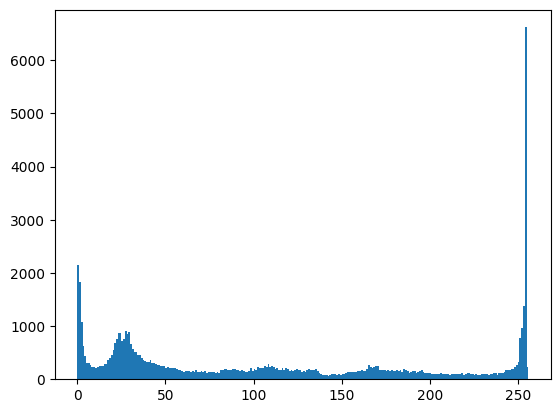

In [11]:
plt.hist(img4_2gray.ravel(), 256, [0,256])
plt.show()

In [8]:
img_contraster = contrast_stretching(img4_2gray)
cv.imshow("contrast stretching", img_contraster)
cv.waitKey(0)
cv.destroyAllWindows()

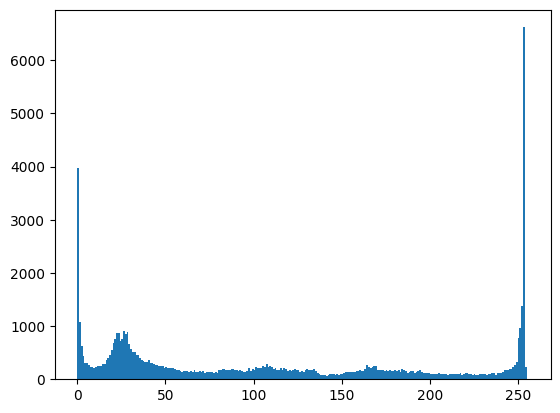

In [12]:
plt.hist(img_contraster.ravel(), 256, [0,256])
plt.show()

4.Pillow thu vien

In [40]:
img5 = Image.open("image.png")

In [42]:
enhancer = ImageEnhance.Contrast(img5)
new_img = enhancer.enhance(2.5)
new_img.show()

**III.Adjust sharpness**

1.PILLow thu vien

In [45]:
img6 = Image.open("image.png")

In [47]:
enhancer = ImageEnhance.Sharpness(img6)
new_img1 = enhancer.enhance(3)
new_img1.show()

**IV.Adjust color**

In [48]:
img7 = Image.open("image.png")

In [49]:
enhancer = ImageEnhance.Color(img7)
new_img2 = enhancer.enhance(2)
new_img2.show()

**V.Convert from color image to grayscale**

1.Opencv code chay

In [50]:
img8 = cv.imread("image.png")

In [52]:
h, w = img8.shape[0:2]
for i in range(h):
    for j in range(w):
        img8[i, j] = sum(img8[i, j]) / 3
cv.imshow("window", img8)
cv.waitKey(0)
cv.destroyAllWindows()

2.Opencv thu vien

In [53]:
img9 = cv.imread("image.png")

In [54]:
gray_img = cv.cvtColor(img9, cv.COLOR_BGR2GRAY)
cv.imshow("window", gray_img)
cv.waitKey(0)
cv.destroyAllWindows()

3.PILLOW code chay(Phù hợp với ảnh có mode là "RGB")

In [57]:
img10 = Image.open("anhcmt.jpg")

In [58]:
pixel = img10.load()
new_img = Image.new(img10.mode, img10.size)
new_pixel = new_img.load()
for i in range(new_img.size[0]):
    for j in range(new_img.size[1]):
        r, b, g = pixel[i, j]
        avg = int(round((r + b + g) / 3))
        new_pixel[i, j] = (avg, avg, avg, 0)
new_img.show()

4.PILLOW thu vien

In [59]:
img11 = Image.open("image.png")

In [60]:
gray_img = img11.convert("L")
gray_img.show()

**VI.Create border**

1.Opencv thu vien

In [17]:
img12 = cv.imread("image.png")

In [18]:
img_border = cv.copyMakeBorder(img12, 10, 10, 10, 10, cv.BORDER_CONSTANT, value = 50)
cv.imshow("window", img_border)
cv.waitKey(0)
cv.destroyAllWindows()

**IX.Threshoding**

1.Opencv thu vien

In [2]:
img15 = cv.imread("image.png")

In [4]:
img_gray1 = cv.cvtColor(img15, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img_gray1, 120, 255, cv.THRESH_BINARY)
cv.imshow("window", thresh)
cv.waitKey(0)
cv.destroyAllWindows()

4.Crop Image

In [10]:
img_crop = cv2.imread("anh_data/image.png")
img_crop.shape

(223, 297, 3)

In [11]:
crop = img_crop[:150, :200]
cv2.imshow("Original", img_crop)
cv2.imshow("Crop Image", crop)
cv2.waitKey(0)
cv2.destroyAllWindows()